<a href="https://colab.research.google.com/github/PriyanshuKSG/Aritificial_Neural_Network_22B2165/blob/main/3_layer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

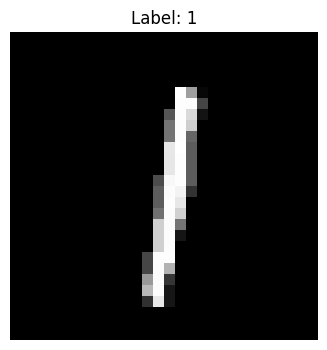

In [ ]:
plt.figure(figsize=(12, 4))
plt.imshow(X_train[8574], cmap='gray')
plt.title(f"Label: {Y_train[8574]}")
plt.axis('off')
plt.show()

In [ ]:
X_train = np.array(X_train).reshape((28*28, X_train.shape[0],)).astype("float32")
X_test = np.array(X_test).reshape((28*28, X_test.shape[0],)).astype("float32")

In [ ]:
Y_train = np.array(Y_train).reshape((1, Y_train.shape[0]))
Y_test = np.array(Y_test).reshape((1, Y_test.shape[0]))

In [ ]:
X_train /= 255.0
X_test /= 255.0

In [ ]:
X_train.shape

(784, 60000)

In [ ]:
m = X_train.shape[1]
n_x = X_train.shape[0]

In [ ]:
def initialize_parameters():
  parameters = {}
  parameters["W1"] = np.random.rand(128,n_x)*0.01
  parameters["b1"] = np.zeros((128,1))
  parameters["W2"] = np.random.rand(64,128)*0.01
  parameters["b2"] = np.zeros((64,1))
  parameters["W3"] = np.random.rand(10,64)*0.01
  parameters["b3"] = np.zeros((10,1))
  return parameters

In [ ]:
# Verify

params = initialize_parameters()
params["W2"]

array([[0.00110344, 0.00654397, 0.00884498, ..., 0.00185495, 0.00087203,
        0.00352218],
       [0.00097243, 0.00390123, 0.00926972, ..., 0.00179608, 0.00659181,
        0.00367647],
       [0.00255474, 0.0022047 , 0.00321675, ..., 0.0002422 , 0.00512186,
        0.00460403],
       ...,
       [0.00346157, 0.00567593, 0.00813591, ..., 0.00487243, 0.00123306,
        0.00124169],
       [0.002006  , 0.00068448, 0.00427507, ..., 0.00024424, 0.00457332,
        0.00867172],
       [0.00265451, 0.00884968, 0.00680844, ..., 0.00208914, 0.00388392,
        0.00097531]])

In [ ]:
def ReLu_af(Z):
  return np.maximum(0, Z)

In [ ]:
# Verify

print(params["W2"])
print(ReLu_af(params["W2"]))

[[0.00110344 0.00654397 0.00884498 ... 0.00185495 0.00087203 0.00352218]
 [0.00097243 0.00390123 0.00926972 ... 0.00179608 0.00659181 0.00367647]
 [0.00255474 0.0022047  0.00321675 ... 0.0002422  0.00512186 0.00460403]
 ...
 [0.00346157 0.00567593 0.00813591 ... 0.00487243 0.00123306 0.00124169]
 [0.002006   0.00068448 0.00427507 ... 0.00024424 0.00457332 0.00867172]
 [0.00265451 0.00884968 0.00680844 ... 0.00208914 0.00388392 0.00097531]]
[[0.00110344 0.00654397 0.00884498 ... 0.00185495 0.00087203 0.00352218]
 [0.00097243 0.00390123 0.00926972 ... 0.00179608 0.00659181 0.00367647]
 [0.00255474 0.0022047  0.00321675 ... 0.0002422  0.00512186 0.00460403]
 ...
 [0.00346157 0.00567593 0.00813591 ... 0.00487243 0.00123306 0.00124169]
 [0.002006   0.00068448 0.00427507 ... 0.00024424 0.00457332 0.00867172]
 [0.00265451 0.00884968 0.00680844 ... 0.00208914 0.00388392 0.00097531]]


In [ ]:
def cost_fn(Y_pred, Y_true):
  epsilon = 1e-15
  Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
  J = -1*np.sum(Y_true*np.log(Y_pred))
  J /= Y_pred.shape[1]
  return J

In [ ]:
# Verify

Y_pred = np.array([[1,1,1],[1,1,1]])
Y_true = np.array([[1,0,1],[0.5,1,1.6]])
J = cost_fn(Y_pred, Y_true)
J

1.6986412276764908e-15

In [ ]:
def Softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))
    return exp_Z / exp_Z.sum(axis=0, keepdims=True)

In [ ]:
def forward_prop(parameters, X):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  cache = {}

  Z1 = np.dot(W1, X) + b1
  A1 = ReLu_af(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = ReLu_af(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = Softmax(Z3)

  cache["Z1"] = Z1
  cache["A1"] = A1
  cache["Z2"] = Z2
  cache["A2"] = A2
  cache["Z3"] = Z3
  cache["A3"] = A3

  return A3, cache

In [ ]:
# Verify

x = np.array([[1, 2, 3], [4, -5, 9]])

# Calculate softmax
softmax_probs = Softmax(x)

print(softmax_probs)

[[4.74258732e-02 9.99088949e-01 2.47262316e-03]
 [9.52574127e-01 9.11051194e-04 9.97527377e-01]]


In [ ]:
def ReLu_derivative(Z):
    return np.where(Z > 0, 1, 0)

In [ ]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [ ]:
def back_prop(parameters,cache, X, Y):

  Y = one_hot(Y)

  Z1 = cache["Z1"]
  A1 = cache["A1"]
  Z2 = cache["Z2"]
  A2 = cache["A2"]
  Z3 = cache["Z3"]
  A3 = cache["A3"]

  W1 = parameters["W1"]
  W2 = parameters["W2"]
  W3 = parameters["W3"]

  grads = {}

  dZ3 = A3 - Y
  dW3 = (1/Y.shape[1])*(np.dot(dZ3, A2.T))
  db3 = (1/Y.shape[1])*(np.sum(dZ3, axis = 1, keepdims = True))

  dA2 = np.dot(W3.T, dZ3)
  dZ2 = dA2*ReLu_derivative(Z2)
  dW2 = (1/Y.shape[1])*(np.dot(dZ2, A1.T))
  db2 = (1/Y.shape[1])*(np.sum(dZ2, axis = 1, keepdims = True))

  dA1 = np.dot(W2.T, dZ2)
  dZ1 = dA1*ReLu_derivative(Z1)
  dW1 = (1/Y.shape[1])*(np.dot(dZ1, X.T))
  db1 = (1/Y.shape[1])*(np.sum(dZ1, axis = 1, keepdims = True))

  grads["dW1"] = dW1
  grads["db1"] = db1
  grads["dW2"] = dW2
  grads["db2"] = db2
  grads["dW3"] = dW3
  grads["db3"] = db3

  return grads

In [ ]:
def update_parameters(parameters, grads, lr):
  parameters["W1"] -= lr*grads["dW1"]
  parameters["b1"] -= lr*grads["db1"]
  parameters["W2"] -= lr*grads["dW2"]
  parameters["b2"] -= lr*grads["db2"]
  parameters["W3"] -= lr*grads["dW3"]
  parameters["b3"] -= lr*grads["db3"]

  return parameters

In [ ]:
def gradient_descent(learning_rate, num_iterations, X, Y):

  parameters = initialize_parameters()

  J = []

  for i in range(num_iterations):

    Y_pred, cache = forward_prop(parameters, X)

    cost = cost_fn(Y_pred, Y)
    J.append(cost)

    grads = back_prop(parameters, cache, X, Y)

    #parameters = update_parameters(parameters, grads, learning_rate)

    lr = learning_rate
    parameters["W1"] -= lr*grads["dW1"]
    parameters["b1"] -= lr*grads["db1"]
    parameters["W2"] -= lr*grads["dW2"]
    parameters["b2"] -= lr*grads["db2"]
    parameters["W3"] -= lr*grads["dW3"]
    parameters["b3"] -= lr*grads["db3"]

  return parameters, J

In [ ]:
params_dict, J_fn = gradient_descent(0.001, 10, X_train, Y_train)

In [ ]:
J_fn

[102.55743185415201,
 102.55743477112755,
 102.55743775852903,
 102.55744081618664,
 102.55744394393109,
 102.5574471415931,
 102.55745040900376,
 102.55745374599489,
 102.55745715239794,
 102.55746062804535]